# Import necessary dependencies and settings

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.stats as spstats

%matplotlib inline
mpl.style.reload_library()
mpl.style.use('classic')
mpl.rcParams['figure.facecolor'] = (1, 1, 1, 0)
mpl.rcParams['figure.figsize'] = [6.0, 4.0]
mpl.rcParams['figure.dpi'] = 100

# Raw Measures

## Values

In [5]:
# Lee Pokemon.csv en un DataFrame
poke_df = pd.read_csv('Ficheros/Pokemon.csv', encoding='latin-1')

In [3]:
# Muestra las columnas HP, Attack y Defense


In [4]:
# Muestra una descripción de esas columnas


## Counts

Load the song_views.csv dataset and understand the features.

In [3]:
# Lee song_views.csv y visualízalo en un DataFrame
songs_df = pd.read_csv('Ficheros/song_views.csv')

# Binarization

Often raw frequencies or counts may not be relevant for building a model based on the problem which is being solved. For instance if I’m building a recommendation system for song recommendations, I would just want to know if a person is interested or has listened to a particular song. This doesn’t require the number of times a song has been listened to since I am more concerned about the various songs he\she has listened to. In this case, a binary feature is preferred as opposed to a count based feature. Add a column that includes this information, with a new column watched, that takes the value 1, when the listen count is >0


In [6]:
# en el DataFrame de canciones, añade una columna que indique con el valor 1 si esa canción se ha escuchado alguna vez
songs_df['listened'] = songs_df['listen_count'] >0

In [25]:
# Muestra un head para ver tus resultados
songs_df.head()

,user_id,song_id,title,listen_count,listened,binario_sklearn
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,True,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,False,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,False,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,False,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,False,0


## Binarization with sklearn

Look at the documentation of sklearn preprecessing. Specifically to the Binarizer method. Try to use this method to obtainn a binarization of the song_views dataset.

In [9]:
# Busca documentación sobre el preprocesado de sklearn (en concreto, Binarizer)
from sklearn.preprocessing import Binarizer

transformer = Binarizer(threshold=0)

transformer


Binarizer(threshold=0)

In [10]:
songs_df['listen_count']

0      2
1      0
2      0
3      0
4      0
      ..
360    0
361    0
362    0
363    0
364    0
Name: listen_count, Length: 365, dtype: int64

In [11]:
songs_df['listen_count'].values;

In [15]:
binario_sklearn = transformer.transform(songs_df['listen_count'].values.reshape(-1,1))

In [16]:
songs_df['binario_sklearn'] = binario_sklearn


In [17]:
songs_df.head()

,user_id,song_id,title,listen_count,listened,binario_sklearn
0,b6b799f34a204bd928ea014c243ddad6d0be4f8f,SOBONKR12A58A7A7E0,You're The One,2,True,1
1,b41ead730ac14f6b6717b9cf8859d5579f3f8d4d,SOBONKR12A58A7A7E0,You're The One,0,False,0
2,4c84359a164b161496d05282707cecbd50adbfc4,SOBONKR12A58A7A7E0,You're The One,0,False,0
3,779b5908593756abb6ff7586177c966022668b06,SOBONKR12A58A7A7E0,You're The One,0,False,0
4,dd88ea94f605a63d9fc37a214127e3f00e85e42d,SOBONKR12A58A7A7E0,You're The One,0,False,0


# Rounding

Load the item_popularity.csv dataset and understand the features.

In [19]:
item_df = pd.read_csv('Ficheros/item_popularity.csv', encoding='latin-1')
item_df.head()

,item_id,pop_percent
0,it_01345,0.98324
1,it_03431,0.56123
2,it_04572,0.12098
3,it_98021,0.35476
4,it_01298,0.92101


Include new columns in the dataset showing a popularity scale of 100 and 1000, being those 2 columns integer numbers.

In [21]:
item_df['pop_100'] = item_df['pop_percent']*100
item_df['pop_1000'] = item_df['pop_percent']*1000

In [22]:
item_df

,item_id,pop_percent,pop_100,pop_1000
0,it_01345,0.98324,98.324,983.24
1,it_03431,0.56123,56.123,561.23
2,it_04572,0.12098,12.098,120.98
3,it_98021,0.35476,35.476,354.76
4,it_01298,0.92101,92.101,921.01
5,it_90120,0.81212,81.212,812.12
6,it_10123,0.56502,56.502,565.02


# Interactions

Load the pokemon dataset. Build a new data set including only 'Attack' and 'Defense'.

In [27]:
poke_df_ad = pokemon_df[['Attack', 'Defense']]

In [29]:
poke_df_ad.head()

,Attack,Defense
0,49,49
1,62,63
2,82,83
3,52,43
4,64,58


In [34]:
#Queremos saber como es de bueno un pokemon, creando una nueva columna que combine ataque y defensa
from sklearn.preprocessing import PolynomialFeatures

# poly es un objeto para hacer extensiones polinómicas
# le hemos indicado que sea de grado dos
# con fit_transform aprende de los datos que le hemos pasado
poly = PolynomialFeatures(2, interaction_only = True)
poly.fit_transform(poke_df_ad);

Build a new dataframe using the PolynomialFeatures method in sklearn.preprocesing. Use a degree 2 polynomic function. Try to understand what is happening.

In [39]:
# La primera columna es todo unos; para asegurarnos que w0 participa en el cálculo
# w0 es el intercept
# w0*1 + w1*x0  + w2*x1
# a * 1 + b x0 +    (Fórmula del polinomio de segundo grado)
poly.get_feature_names_out()

array(['1', 'x0', 'x1', 'x0 x1'], dtype=object)

In [38]:
poke_df_ad_poly = pd.DataFrame(poly.fit_transform(poke_df_ad.values), columns = poly.get_feature_names_out())

In [41]:
poke_df_ad_poly.head()

,1,x0,x1,x0 x1
0,1.0,49.0,49.0,2401.0
1,1.0,62.0,63.0,3906.0
2,1.0,82.0,83.0,6806.0
3,1.0,52.0,43.0,2236.0
4,1.0,64.0,58.0,3712.0


In [42]:
# Lo que estamos calculando es el Ataque x Defensa, es decir, una medida de fortaleza del pokemon

# Binning

Import the dataset in fcc_2016_coder_survey_subset.csv

In [10]:
# Nos interesan solo 'ID.x', 'EmploymentField', 'Age', 'Income'

## Fixed-width binning

Create an histogram with the Age of the developers

In [44]:
fcc_survey_df = pd.read_csv('Ficheros/fcc_2016_coder_survey_subset.csv', encoding='latin-1')
fcc_survey_df.head()

,ID.x,Age,ChildrenNumber,CountryCitizen,EmploymentField,EmploymentStatus,ExpectedEarning,Gender,Income,JobPref,JobRoleInterest,LanguageAtHome,MaritalStatus,SchoolDegree,StudentDebtOwe
0,cef35615d61b202f1dc794ef2746df14,28.0,NaN,United States of America,office and administrative support,Employed for wages,NaN,male,32000.0,freelance,NaN,English,married or domestic partnership,"some college credit, no degree",20000.0
1,323e5a113644d18185c743c241407754,22.0,NaN,United States of America,food and beverage,Employed for wages,50000.0,male,15000.0,work for a startup,Front-End Web Developer,English,NaN,"some college credit, no degree",NaN
2,b29a1027e5cd062e654a63764157461d,19.0,NaN,United States of America,finance,Employed for wages,NaN,male,48000.0,start your own business,NaN,English,NaN,high school diploma or equivalent (GED),NaN
3,04a11e4bcb573a1261eb0d9948d32637,26.0,NaN,United States of America,"arts, entertainment, sports, or media",Employed for wages,65000.0,female,43000.0,work for a startup,Front-End Web Developer,English,NaN,bachelor's degree,7000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,NaN,United States of America,education,Employed for wages,45000.0,female,6000.0,work for a medium-sized company,Full-Stack Web Developer,Khmer,NaN,"some college credit, no degree",NaN


(array([5.880e+02, 4.840e+03, 4.421e+03, 2.249e+03, 8.550e+02, 4.630e+02,
        1.570e+02, 3.000e+01, 8.000e+00, 2.000e+00]),
 array([10. , 17.6, 25.2, 32.8, 40.4, 48. , 55.6, 63.2, 70.8, 78.4, 86. ]),
 <BarContainer object of 10 artists>)

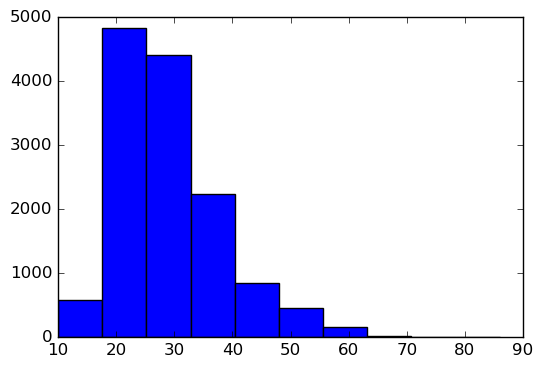

In [54]:


from matplotlib.pyplot import hist
hist(fcc_survey_df.Age)

Text(0, 0.5, 'Frequency')

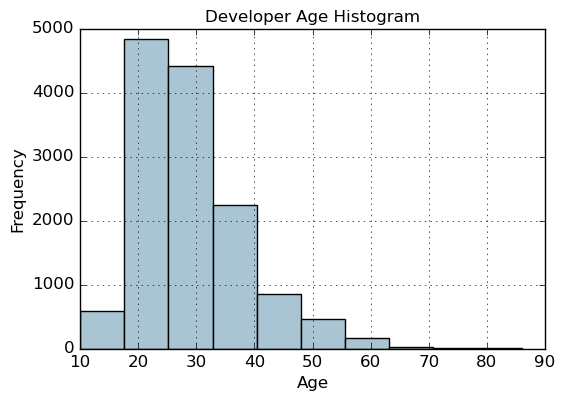

In [55]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize= 12)
ax.set_ylabel('Frequency', fontsize=12)

### Developer age distribution

### Binning based on custom ranges

Create two new columns in the dataframe. The first one should include the custom age range. The second one should include the bin_label. You should use the cut() function.

``` 
Age Range : Bin
---------------
 0 -  15  : 1
16 -  30  : 2
31 -  45  : 3
46 -  60  : 4
61 -  75  : 5
75 - 100  : 6
```

In [56]:
fcc_survey_df['Age_bin_round'] = np.floor(fcc_survey_df['Age']/10)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


In [57]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]
fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges, labels=bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 
               'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


## Quantile based binning

Now we will work with the salaries of the dataset

### Plot an histogram with the developers income, with 30 bins.

Text(0, 0.5, 'Frequency')

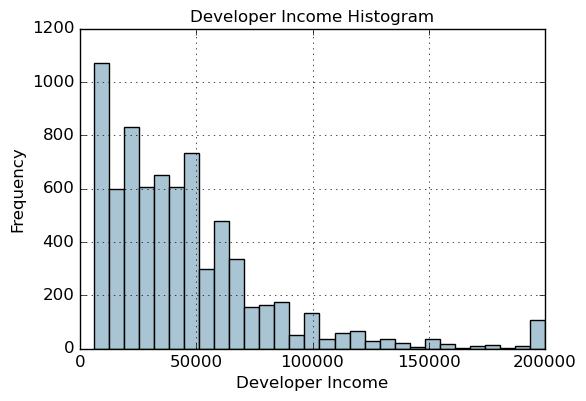

In [59]:
fig, ax = plt.subplots()
fcc_survey_df['Income'].hist(bins=30, color='#A9C5D3')
ax.set_title('Developer Income Histogram', fontsize=12)
ax.set_xlabel('Developer Income', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)

### Calculate the [0, .25, .5, .75, 1.] qunatiles, and plot them as lines in the histogram

In [51]:
quantile_list = [0, .25, .5, .75, 1.]
quantiles = fcc_survey_df['Income'].quantile(quantile_list)
quantiles

0.00      6000.0
0.25     20000.0
0.50     37000.0
0.75     60000.0
1.00    200000.0
Name: Income, dtype: float64

### In the original dataframe create 2 columns. One that indicates the income range values, and a second one with the following labels: ['0-25Q', '25-50Q', '50-75Q', '75-100Q']

In [52]:
quantile_labels = ['0-25Q', '25-50Q', '50-75Q', '75-100Q']
fcc_survey_df['Income_quantile_range'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list)
fcc_survey_df['Income_quantile_label'] = pd.qcut(fcc_survey_df['Income'], 
                                                 q=quantile_list, labels=quantile_labels)
fcc_survey_df[['ID.x', 'Age', 'Income', 
               'Income_quantile_range', 'Income_quantile_label']].iloc[4:9]

,ID.x,Age,Income,Income_quantile_range,Income_quantile_label
4,9368291c93d5d5f5c8cdb1a575e18bec,20.0,6000.0,"(5999.999, 20000.0]",0-25Q
5,dd0e77eab9270e4b67c19b0d6bbf621b,34.0,40000.0,"(37000.0, 60000.0]",50-75Q
6,7599c0aa0419b59fd11ffede98a3665d,23.0,32000.0,"(20000.0, 37000.0]",25-50Q
7,6dff182db452487f07a47596f314bddc,35.0,40000.0,"(37000.0, 60000.0]",50-75Q
8,9dc233f8ed1c6eb2432672ab4bb39249,33.0,80000.0,"(60000.0, 200000.0]",75-100Q


In [60]:
income_log_mean = np.round(np.mean(fcc_survey_df['Income_log']), 2)

fig, ax = plt.subplots()
fcc_survey_df['Income_log'].hist(bins=30, color='#A9C5D3')
plt.axvline(income_log_mean, color='r')
ax.set_title('Developer Income Histogram after Log Transform', fontsize=12)
ax.set_xlabel('Developer Income (log scale)', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12)
ax.text(11.5, 450, r'$\mu$='+str(income_log_mean), fontsize=10);

KeyError: 'Income_log'

# Mathematical Transformations

## Log transform

In the salaries survey dataset include a new column with the log transformation of the income called 'Income_log'.


Plot the instogram of the 'Income_log' column, with 30 bins. Include a line showing the mean of the new colunm in the histogram plot.

## Box–Cox transform

Build 2 new columns with the 'boxcox' method.

In the first place you have to remove the NaN in in come and calculate the optimal lambda with boxcox.

Then build the dataframe using lmbda=0 and the optimal value including the columns 'Income_boxcox_lambda_0' and 'Income_boxcox_lambda_opt'. 

Visualize the results. As you can see the lmbda=0 creates a log transformation. 


### Plot the histogram of the 'Income_boxcox_lambda_opt' column, with 30 bins. Include a line showing the mean of the new colunm in the histogram plot. Plot a line with the value of the mean of the new column.

Text(24, 450, '$\\mu$=20.65')

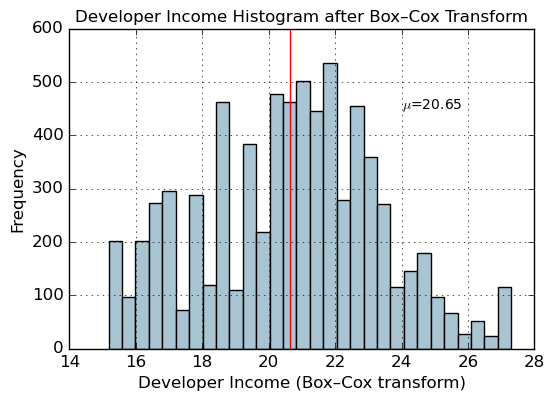